In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import boxcox,skew,norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [2]:
#reading the dataset

bank_data = pd.read_csv('PL_XSELL.csv')

In [3]:
bank_data.shape

(20000, 40)

In [4]:
bank_data.head()

,CUST_ID,TARGET,AGE,GENDER,BALANCE,OCCUPATION,AGE_BKT,SCR,HOLDING_PERIOD,ACC_TYPE,...,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN,random
0,C7927,0,27,M,3383.75,SELF-EMP,26-30,776,30,SA,...,0,0,13100.0,0.0,0.0,486778.50,0.0,1,1,0.000011
1,C6877,0,47,M,287489.04,SAL,46-50,324,28,SA,...,0,0,6600.0,0.0,0.0,799813.00,0.0,1,0,0.000111
2,C19922,0,40,M,18216.88,SELF-EMP,36-40,603,2,SA,...,0,1,11200.0,561120.0,24660.0,997570.00,0.0,1,1,0.000120
3,C8183,0,53,M,71720.48,SAL,>50,196,13,CA,...,0,0,13050.0,168397.5,15195.0,247168.67,71388.0,1,0,0.000137
4,C12123,0,36,M,1671622.89,PROF,36-40,167,24,SA,...,0,0,0.0,808480.0,0.0,0.00,0.0,1,0,0.000174


In [5]:
bank_data.drop(['random','CUST_ID'],axis=1,inplace=True)

In [6]:
bank_data.info()#checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 38 columns):
TARGET                      20000 non-null int64
AGE                         20000 non-null int64
GENDER                      20000 non-null object
BALANCE                     20000 non-null float64
OCCUPATION                  20000 non-null object
AGE_BKT                     20000 non-null object
SCR                         20000 non-null int64
HOLDING_PERIOD              20000 non-null int64
ACC_TYPE                    20000 non-null object
ACC_OP_DATE                 20000 non-null object
LEN_OF_RLTN_IN_MNTH         20000 non-null int64
NO_OF_L_CR_TXNS             20000 non-null int64
NO_OF_L_DR_TXNS             20000 non-null int64
TOT_NO_OF_L_TXNS            20000 non-null int64
NO_OF_BR_CSH_WDL_DR_TXNS    20000 non-null int64
NO_OF_ATM_DR_TXNS           20000 non-null int64
NO_OF_NET_DR_TXNS           20000 non-null int64
NO_OF_MOB_DR_TXNS           20000 non-null int64
NO

In [7]:
bank_data.isna().sum()#checking null values

TARGET                      0
AGE                         0
GENDER                      0
BALANCE                     0
OCCUPATION                  0
AGE_BKT                     0
SCR                         0
HOLDING_PERIOD              0
ACC_TYPE                    0
ACC_OP_DATE                 0
LEN_OF_RLTN_IN_MNTH         0
NO_OF_L_CR_TXNS             0
NO_OF_L_DR_TXNS             0
TOT_NO_OF_L_TXNS            0
NO_OF_BR_CSH_WDL_DR_TXNS    0
NO_OF_ATM_DR_TXNS           0
NO_OF_NET_DR_TXNS           0
NO_OF_MOB_DR_TXNS           0
NO_OF_CHQ_DR_TXNS           0
FLG_HAS_CC                  0
AMT_ATM_DR                  0
AMT_BR_CSH_WDL_DR           0
AMT_CHQ_DR                  0
AMT_NET_DR                  0
AMT_MOB_DR                  0
AMT_L_DR                    0
FLG_HAS_ANY_CHGS            0
AMT_OTH_BK_ATM_USG_CHGS     0
AMT_MIN_BAL_NMC_CHGS        0
NO_OF_IW_CHQ_BNC_TXNS       0
NO_OF_OW_CHQ_BNC_TXNS       0
AVG_AMT_PER_ATM_TXN         0
AVG_AMT_PER_CSH_WDL_TXN     0
AVG_AMT_PE

In [8]:
bank_data.describe(include='all').transpose()#descriptive statistics

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TARGET,20000,NaN,NaN,NaN,0.1256,0.331406,0,0,0,0,1
AGE,20000,NaN,NaN,NaN,38.4181,9.57798,21,30,38,46,55
GENDER,20000,3,M,14376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BALANCE,20000,NaN,NaN,NaN,511362,723593,0,64754,231676,653877,8.36043e+06
OCCUPATION,20000,4,SAL,5855,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE_BKT,20000,7,26-30,3434,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SCR,20000,NaN,NaN,NaN,440.15,249.888,100,227,364,644,999
HOLDING_PERIOD,20000,NaN,NaN,NaN,14.9557,8.64263,1,7,15,22,31
ACC_TYPE,20000,2,SA,15759,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACC_OP_DATE,20000,4869,11/16/2010,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
bank_data['GENDER'] = le.fit_transform(bank_data['GENDER'])
bank_data['AGE_BKT'] = le.fit_transform(bank_data['AGE_BKT'])
bank_data['OCCUPATION'] = le.fit_transform(bank_data['OCCUPATION'])
bank_data['ACC_TYPE'] = le.fit_transform(bank_data['ACC_TYPE'])


In [10]:
bank_data['ACC_OP_DATE'][:3]

0     3/23/2005
1    10-11-2008
2     4/26/2012
Name: ACC_OP_DATE, dtype: object

In [11]:
type(bank_data['ACC_OP_DATE'][0])

str

In [12]:
from datetime import date,datetime

In [13]:
# converting into pd datetime format

In [14]:
bank_data['ACC_OP_DATE']=pd.to_datetime(bank_data['ACC_OP_DATE'])

In [15]:
type(bank_data['ACC_OP_DATE'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
bank_data.head(3)

,TARGET,AGE,GENDER,BALANCE,OCCUPATION,AGE_BKT,SCR,HOLDING_PERIOD,ACC_TYPE,ACC_OP_DATE,...,AMT_MIN_BAL_NMC_CHGS,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN
0,0,27,1,3383.75,2,0,776,30,1,2005-03-23,...,0,0,0,13100.0,0.0,0.0,486778.5,0.0,1,1
1,0,47,1,287489.04,1,4,324,28,1,2008-10-11,...,0,0,0,6600.0,0.0,0.0,799813.0,0.0,1,0
2,0,40,1,18216.88,2,2,603,2,1,2012-04-26,...,0,0,1,11200.0,561120.0,24660.0,997570.0,0.0,1,1


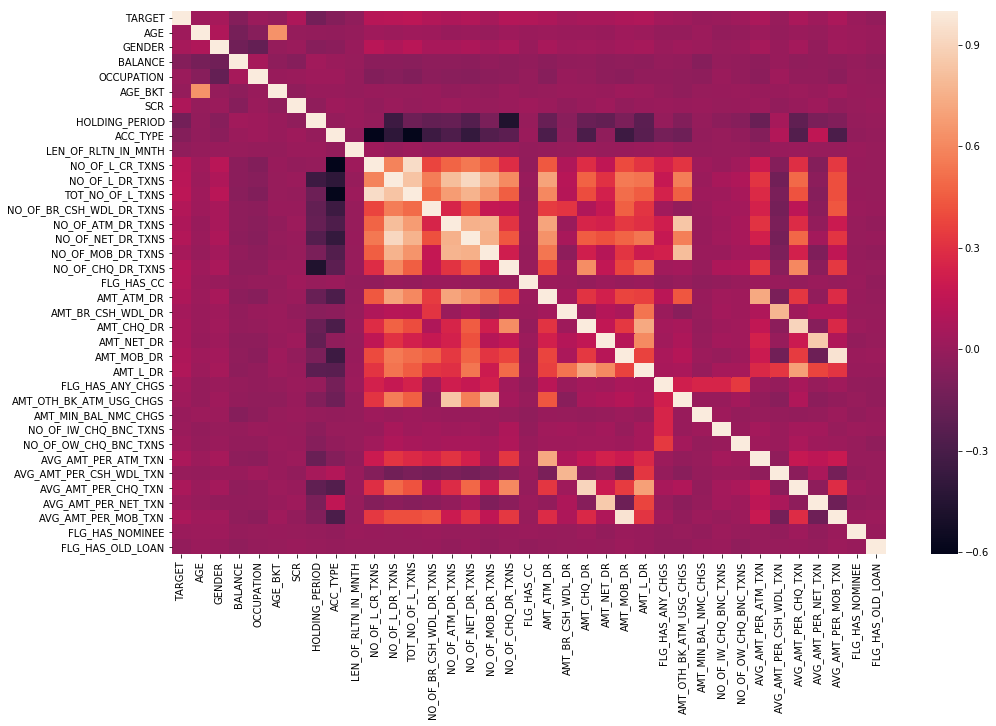

In [17]:
plt.subplots(figsize=(16,10))
sns.heatmap(bank_data.corr())

#Target variable has very lesscorrelation with other attributes

In [21]:
bank_data.columns


Index(['TARGET', 'AGE', 'GENDER', 'BALANCE', 'OCCUPATION', 'AGE_BKT', 'SCR',
       'HOLDING_PERIOD', 'ACC_TYPE', 'ACC_OP_DATE', 'LEN_OF_RLTN_IN_MNTH',
       'NO_OF_L_CR_TXNS', 'NO_OF_L_DR_TXNS', 'TOT_NO_OF_L_TXNS',
       'NO_OF_BR_CSH_WDL_DR_TXNS', 'NO_OF_ATM_DR_TXNS', 'NO_OF_NET_DR_TXNS',
       'NO_OF_MOB_DR_TXNS', 'NO_OF_CHQ_DR_TXNS', 'FLG_HAS_CC', 'AMT_ATM_DR',
       'AMT_BR_CSH_WDL_DR', 'AMT_CHQ_DR', 'AMT_NET_DR', 'AMT_MOB_DR',
       'AMT_L_DR', 'FLG_HAS_ANY_CHGS', 'AMT_OTH_BK_ATM_USG_CHGS',
       'AMT_MIN_BAL_NMC_CHGS', 'NO_OF_IW_CHQ_BNC_TXNS',
       'NO_OF_OW_CHQ_BNC_TXNS', 'AVG_AMT_PER_ATM_TXN',
       'AVG_AMT_PER_CSH_WDL_TXN', 'AVG_AMT_PER_CHQ_TXN', 'AVG_AMT_PER_NET_TXN',
       'AVG_AMT_PER_MOB_TXN', 'FLG_HAS_NOMINEE', 'FLG_HAS_OLD_LOAN'],
      dtype='object')

In [22]:
#Univariate analysis

In [23]:
bank_data.TARGET.value_counts()


0    17488
1     2512
Name: TARGET, dtype: int64

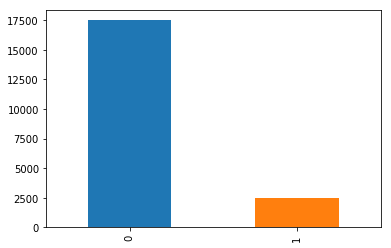

In [24]:
bank_data.TARGET.value_counts().plot(kind='bar')

#class 0 is higher than class 1

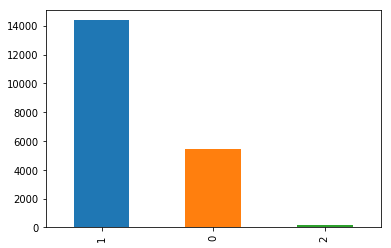

In [25]:
bank_data.GENDER.value_counts().plot(kind='bar')

#Most number of account holders are of gender male

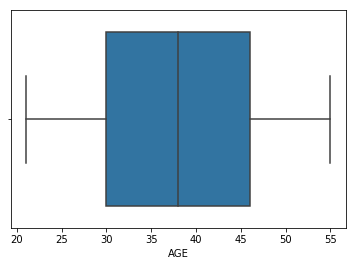

In [26]:
sns.boxplot(bank_data.AGE)

#Most of the Account Holders(68%) are between 30 to 46 years of age

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


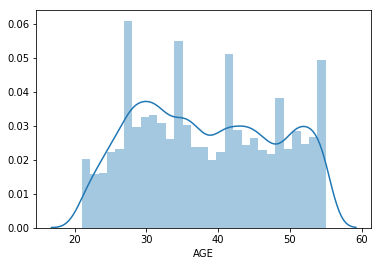

In [27]:
sns.distplot(bank_data.AGE)

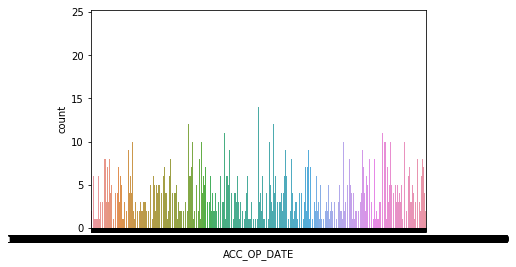

In [61]:
sns.countplot(bank_data['ACC_OP_DATE'])

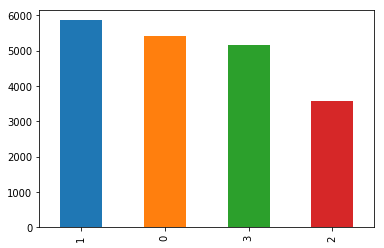

In [28]:
bank_data.OCCUPATION.value_counts().plot(kind='bar')

2    725
0    655
1    590
3    542
Name: OCCUPATION, dtype: int64


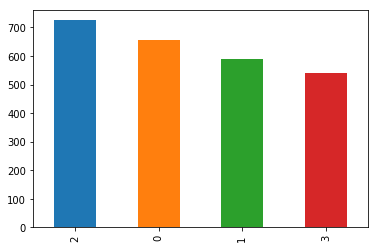

In [34]:
#occupation wise interested in new loan  policy
bank_data.OCCUPATION[bank_data.TARGET==1].value_counts().plot(kind='bar')
print(bank_data.OCCUPATION[bank_data.TARGET==1].value_counts())

In [42]:
(bank_data.OCCUPATION[bank_data.TARGET==1].value_counts()/bank_data.OCCUPATION.value_counts())*100

0    12.091564
1    10.076857
2    20.319507
3    10.503876
Name: OCCUPATION, dtype: float64

#Occupation group 2 is more interested in new loan policy (20%)

1    1794
0     718
Name: ACC_TYPE, dtype: int64


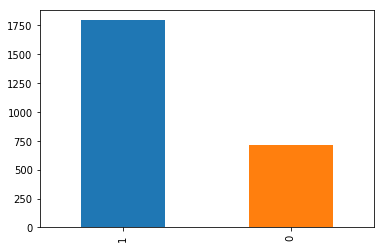

In [49]:
#ACC_TYPE wise interested in new loan  policy
bank_data.ACC_TYPE[bank_data.TARGET==1].value_counts().plot(kind='bar')
print(bank_data.ACC_TYPE[bank_data.TARGET==1].value_counts())


In [50]:
(bank_data.ACC_TYPE[bank_data.TARGET==1].value_counts()/bank_data.ACC_TYPE.value_counts())*100

1    11.383971
0    16.929969
Name: ACC_TYPE, dtype: float64

Percentage wise account type 0 is mor interested in new loan(16%)

1    1930
0     540
2      42
Name: GENDER, dtype: int64


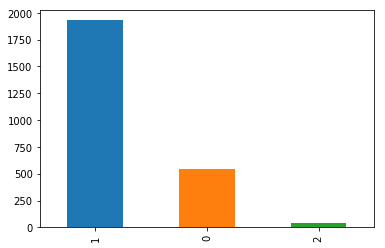

In [33]:
# Gender wise interest in new loan policy
bank_data.GENDER[bank_data.TARGET==1].value_counts().plot(kind='bar')
print(bank_data.GENDER[bank_data.TARGET==1].value_counts())


In [41]:
# GENDER wise  interest in new loan 
(bank_data.GENDER[bank_data.TARGET==1].value_counts()/bank_data.GENDER.value_counts())*100

1    13.425153
0     9.939260
2    21.989529
Name: GENDER, dtype: float64

#Male gender is more interested(13% in new loan
#group 2 is unknown gender and total of 10 such records are present in dataset we can  ignoring those records

In [19]:
# bank_data['ACC_OP_DATE'] = le.fit_transform(bank_data['OCCUPATION'])

In [35]:
bank_data.columns

Index(['TARGET', 'AGE', 'GENDER', 'BALANCE', 'OCCUPATION', 'AGE_BKT', 'SCR',
       'HOLDING_PERIOD', 'ACC_TYPE', 'ACC_OP_DATE', 'LEN_OF_RLTN_IN_MNTH',
       'NO_OF_L_CR_TXNS', 'NO_OF_L_DR_TXNS', 'TOT_NO_OF_L_TXNS',
       'NO_OF_BR_CSH_WDL_DR_TXNS', 'NO_OF_ATM_DR_TXNS', 'NO_OF_NET_DR_TXNS',
       'NO_OF_MOB_DR_TXNS', 'NO_OF_CHQ_DR_TXNS', 'FLG_HAS_CC', 'AMT_ATM_DR',
       'AMT_BR_CSH_WDL_DR', 'AMT_CHQ_DR', 'AMT_NET_DR', 'AMT_MOB_DR',
       'AMT_L_DR', 'FLG_HAS_ANY_CHGS', 'AMT_OTH_BK_ATM_USG_CHGS',
       'AMT_MIN_BAL_NMC_CHGS', 'NO_OF_IW_CHQ_BNC_TXNS',
       'NO_OF_OW_CHQ_BNC_TXNS', 'AVG_AMT_PER_ATM_TXN',
       'AVG_AMT_PER_CSH_WDL_TXN', 'AVG_AMT_PER_CHQ_TXN', 'AVG_AMT_PER_NET_TXN',
       'AVG_AMT_PER_MOB_TXN', 'FLG_HAS_NOMINEE', 'FLG_HAS_OLD_LOAN'],
      dtype='object')

3    527
1    400
0    385
2    379
4    345
6    311
5    165
Name: AGE_BKT, dtype: int64


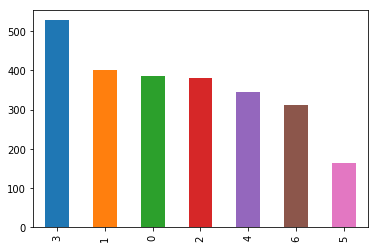

In [36]:
##Age Bucket interested in new policy
bank_data.AGE_BKT[bank_data.TARGET==1].value_counts().plot(kind='bar')
print(bank_data.AGE_BKT[bank_data.TARGET==1].value_counts())


In [40]:
# % of each Age Bucket groups interested in new loan 
(bank_data.AGE_BKT[bank_data.TARGET==1].value_counts()/bank_data.AGE_BKT.value_counts())*100

0    11.211415
1    11.750881
2    13.468372
3    17.182915
4    13.838748
5     9.412436
6    10.247117
Name: AGE_BKT, dtype: float64

In [ ]:
# Age Bucket 3 is more interested(17%) in new loan policy than other age groups

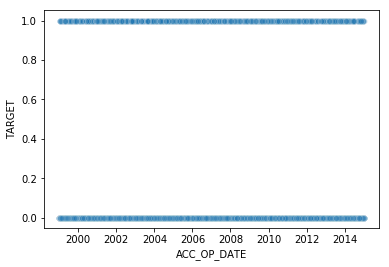

In [20]:
sns.scatterplot(bank_data['ACC_OP_DATE'],bank_data.TARGET,alpha=0.1)

In [88]:
#scaling data
x = bank_data.drop(['ACC_OP_DATE','TARGET'],axis=1)
y =bank_data.TARGET

In [89]:
sc= StandardScaler()


In [90]:
sc.fit_transform(x)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.1921543 ,  0.56856993, -0.70203992, ..., -0.43690909,
         0.33119959,  1.01420082],
       [ 0.89601988,  0.56856993, -0.30939874, ..., -0.43690909,
         0.33119959, -0.98599802],
       [ 0.16515892,  0.56856993, -0.68154013, ..., -0.43690909,
         0.33119959,  1.01420082],
       ...,
       [-0.87892818,  0.56856993, -0.50986937, ...,  2.40374275,
         0.33119959, -0.98599802],
       [ 0.79161117,  0.56856993, -0.16129283, ..., -0.43690909,
         0.33119959, -0.98599802],
       [ 0.26956763,  0.56856993, -0.69683126, ..., -0.43690909,
         0.33119959, -0.98599802]])

In [91]:
from sklearn.model_selection import train_test_split

In [97]:
#splitting data into 70% btrain and 30% test

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [98]:
#CART ALgotrithm

In [113]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

In [100]:
dct = DecisionTreeClassifier()

In [101]:
dct.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [102]:
#train set accuracy score
dct.score(x_train,y_train)

1.0

In [103]:
#test set accuracy score
dct.score(x_test,y_test)

0.9348333333333333

In [ ]:
#check with cross validation

In [104]:
from sklearn.model_selection import cross_val_score

In [105]:
cross_score = cross_val_score(dct,x_test,y_test,cv=5,scoring='accuracy')

In [106]:
cross_score

array([0.8734388 , 0.85166667, 0.86166667, 0.86      , 0.88323603])

In [108]:
#mean accuracy score
print(cross_score.mean())

0.8660016328715043


In [111]:
predit = dct.predict(x_test)#predictd values

In [121]:
#confusion metrics
cm=metrics.confusion_matrix(y_test,predit)

In [122]:
print(cm)

[[5032  229]
 [ 162  577]]


In [119]:
cr=metrics.classification_report(y_test,predit)

In [120]:
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      5261
           1       0.72      0.78      0.75       739

   micro avg       0.93      0.93      0.93      6000
   macro avg       0.84      0.87      0.85      6000
weighted avg       0.94      0.93      0.94      6000



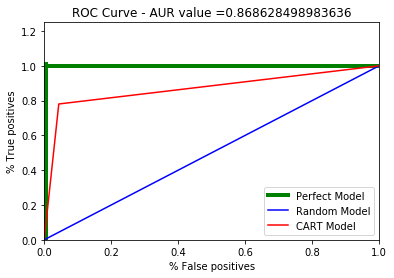

In [118]:
#roc curve

def roccurve(y_values, y_preds_proba):
    fpr, tpr, _ = metrics.roc_curve(y_values, y_preds_proba)
    xx = np.arange(101) / float(100)
    aur = metrics.auc(fpr,tpr)
    plt.xlim(0, 1.0)
    plt.ylim(0, 1.25)
    plt.plot([0.0, 0.0], [0.0, 1.0], color='green', linewidth=8)
    plt.plot([0.0, 1.0], [1.0, 1.0], color='green', label='Perfect Model', linewidth=4)
    plt.plot(xx,xx, color='blue', label='Random Model')
    plt.plot(fpr,tpr, color='red', label='CART Model')
    plt.title("ROC Curve - AUR value ="+str(aur))
    plt.xlabel('% False positives')
    plt.ylabel('% True positives')
    plt.legend()
    plt.show()




dct_test_pred_proba = dct.predict_proba(X=x_test)
roccurve(y_values=y_test, y_preds_proba=dct_test_pred_proba[:,1])